# **Control de Dynamixel AX-Series a través del BUS de OPENCM 485 (EXP-BOARD)**









` Agregamos la librería de Dynamixel`

In [ ]:
#include <DynamixelSDK.h>

**Definimos las Direcciones de Memoria**


https://emanual.robotis.com/docs/en/dxl/ax/ax-12a/#control-table-of-eeprom-area

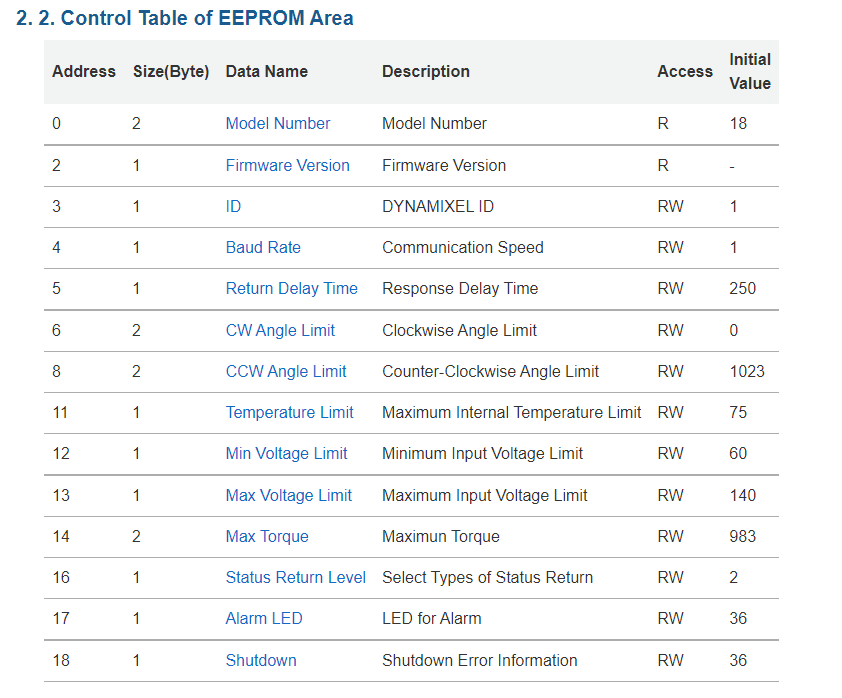

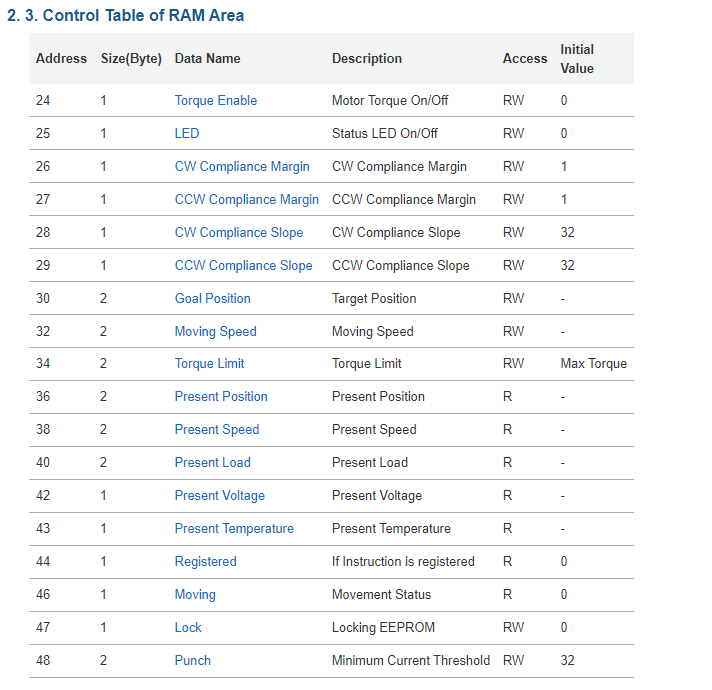

Definimos las direcciones de memoria que nos convengan

In [ ]:
#define ADDR_AX_ID  3
#define ADDR_AX_TORQUE_ENABLE 24
#define ADDR_AX_GOAL_POSITION 30
#define ADDR_AX_PRESENT_POSITION 36
#define ADDR_AX_CW_ANGLE_LIMIT  6
#define ADDR_AX_CCW_ANGLE_LIMIT  8
#define ADDR_AX_DXL_MAXIUM_TORQUE 14
#define ADDR_AX_MOVING_SPEED  32

`Protocolo para AX-Series`




In [ ]:
#define PROTOCOL_VERSION 1.0

`Configuraciones por Defecto (Si no se conocen realizar un Scan)`

In [ ]:
#define DXL_ID 1  
#define BAUDRATE 1000000
#define DEVICENAME "3"  






`
Indica los valores de configuracion que deseas modificar
`









In [ ]:
#define DXL_NEW_ID  1     //Valor si se desea cambiar el ID
#define TORQUE_ENABLE 1   //Valor para habilitar el torque
#define TORQUE_DISABLE 0  //Valor para deshabilitar el torque
#define TORQUE_VALUE 1023 //1023 ->Torque Maximo
#define GOAL_POSITION 400 //Valor posicion
#define SPEED_VALUE   1023   //Valor velociadad

`Para evitar que se traben los motores podemos agregar un umbral`

In [ ]:
#define DXL_MINIMUM_POSITION_VALUE 100
#define DXL_MAXIMUM_POSITION_VALUE 1000
#define DXL_MOVING_STATUS_THRESHOLD 20  //Umbral de movimiento

Creamos variables donde almacenemos los valores actuales





In [ ]:
int16_t dxl_present_position = 0; //Variable almacena posicion actual
int16_t dxl_present_torque = 0;   //Variable almancena torque actual
int16_t dxl_present_speed = 0;  //Variable almancena la velocidad actual
int16_t DXL_ID_V;

**Setup()**

Abrimos las comunicación Serial

In [ ]:
Serial.begin(115200);
while (!Serial);
Serial.println("Comunicación Serial Exitosa");

Instanciamos el objeto portHandler de la clase PortHandlerWindows ->OpenCM 485 EXP's

In [ ]:
dynamixel::PortHandler *portHandler = dynamixel::PortHandler::getPortHandler(DEVICENAME);

Instanciamos el objeto packetHandler de la clase PortHandlerWindows ->Version 1.0

In [ ]:
 dynamixel::PacketHandler *packetHandler = dynamixel::PacketHandler::getPacketHandler(PROTOCOL_VERSION);

Agregamos variable para estado de paquete

In [ ]:
int dxl_comm_result = COMM_TX_FAIL;  //  Fallo transimision de instruccion ->Valor:-1001
uint8_t dxl_error = 0;

Abrimos el Puerto

In [ ]:
if (portHandler->openPort()) 
  {
    Serial.print("Puerto Abierto con Exito!\n");
  } else {
    Serial.print("Error al abrir el puerto!\n");
  }
  //Configuracion el Baudrate
  if (portHandler->setBaudRate(BAUDRATE)) 
  {
    Serial.print("Configuracion de baudrate exitosa\n");
  }

  else 
  {
    Serial.print("Error al configurara el baudrate");
  }

**CODIGO PARA MODIFICAR HABILITACION DE TORQUE**

!Descomentar si se necesita utilizar!


In [ ]:
 Serial.print("Habilitacion de Torque\n");
  dxl_comm_result = packetHandler->write1ByteTxRx(portHandler, DXL_ID, ADDR_AX_TORQUE_ENABLE, TORQUE_ENABLE, &dxl_error);
  if(dxl_comm_result != COMM_SUCCESS)
  {
    packetHandler->getTxRxResult(dxl_comm_result);
      
  }
  else if(dxl_error!=0)
  {
    packetHandler->getRxPacketError(dxl_error);
    Serial.print("b");
  }
  else
  {
    Serial.print("Dynamixel Torque Habilitado con Exito\n");
  }

**CODIGO PARA MODIFICAR DESHABILITACION DE TORQUE**

!Descomentar si se necesita utilizar!


In [ ]:
dxl_comm_result = packetHandler->write1ByteTxRx(portHandler, DXL_ID, ADDR_AX_TORQUE_ENABLE, TORQUE_DISABLE, &dxl_error);
  if (dxl_comm_result != COMM_SUCCESS)
  {
    packetHandler->getTxRxResult(dxl_comm_result);
    Serial.print("aT");
  }
  else if (dxl_error != 0)
  {
    packetHandler->getRxPacketError(dxl_error);
  }
  else
  {
    Serial.print("Dynamixel Torque Deshabilitado con Exito\n");
  }

**WHEEL CONFIGURATION**

-> Este fragmento de codigo permite configura tambien para modo junta, para ello solo indica el sentido de giro<-

!Descomentar si se necesita utilizar!



In [ ]:
dxl_comm_result = packetHandler->write2ByteTxRx(portHandler, DXL_ID, ADDR_AX_CW_ANGLE_LIMIT, 0, &dxl_error);
dxl_comm_result = packetHandler->write2ByteTxRx(portHandler, DXL_ID, ADDR_AX_CCW_ANGLE_LIMIT, 0, &dxl_error);
Serial.print("WHEEL MODE ACTIVADO");

**CONFIGURACION MÁXIMO TORQUE**




In [ ]:
dxl_comm_result = packetHandler->write2ByteTxRx(portHandler, DXL_ID, ADDR_AX_DXL_MAXIUM_TORQUE, TORQUE_VALUE, &dxl_error);

**CONOCER VALOR DEL TORQUE ACTUAL**



In [ ]:
dxl_comm_result = packetHandler->read2ByteTxRx(portHandler, DXL_ID, 14, (uint16_t*)&dxl_present_torque, &dxl_error);


**CONFIGURACION DE VELOCIDAD**

In [ ]:
dxl_comm_result = packetHandler->write2ByteTxRx(portHandler, DXL_ID, ADDR_AX_MOVING_SPEED, SPEED_VALUE, &dxl_error);

**CONOCER VALOR DE VELOCIDAD ACTUAL**

In [ ]:
dxl_comm_result = packetHandler->read2ByteTxRx(portHandler, DXL_ID, 14, (uint16_t*)&dxl_present_speed, &dxl_error);

**CONFIGURACIÓN DE POSICION**

In [ ]:
dxl_comm_result = packetHandler->write2ByteTxRx(portHandler, DXL_ID, ADDR_AX_GOAL_POSITION, GOAL_POSITION, &dxl_error);
  if (dxl_comm_result != COMM_SUCCESS)
  {
    packetHandler->getTxRxResult(dxl_comm_result);      
  }
  else if (dxl_error != 0)
  {
    packetHandler->getRxPacketError(dxl_error);
  }

**CONOCER LA POSCION ACTUAL**

In [ ]:
dxl_comm_result = packetHandler->read2ByteTxRx(portHandler, DXL_ID, ADDR_AX_PRESENT_POSITION, (uint16_t*)&dxl_present_position, &dxl_error);
  if (dxl_comm_result != COMM_SUCCESS)
  {
    packetHandler->getTxRxResult(dxl_comm_result);
  }
  else if (dxl_error != 0)
  {
    packetHandler->getRxPacketError(dxl_error);
  }

**CAMBIO DE ID**

!ATENCION AL CAMBIAR EL ID DE DYNAMIXEL, YA QUE UNA VEZ CAMBIO TENDRAS QUE MODIFICAR EL "#define DXL_ID " AL ID, YA QUE SINO NO SERÁ POSIBLE CONFIGURAR EL *DYNAMIXEL*

In [ ]:
dxl_comm_result = packetHandler->write1ByteTxRx(portHandler, DXL_ID, ADDR_AX_ID, DXL_NEW_ID, &dxl_error);
  
  if(dxl_comm_result != COMM_SUCCESS)
  {
    packetHandler->getTxRxResult(dxl_comm_result);
    Serial.print("ID no ha cambiado con Exito\n");
      
  }
  else if(dxl_error!=0)
  {
    packetHandler->getRxPacketError(dxl_error);
    Serial.print("ID no ha cambiado con Exito\n");
    
  }
  else
  {
    DXL_ID_V=DXL_NEW_ID;
    Serial.print("ID cambiado con Exito\n");
  }

**OUTPUT**

Para finalizar se imprimira en el monitor serial el estado actual en que se encutra el DYNAMIXEL

In [ ]:
  Serial.print("[ID:");      Serial.print(DXL_ID);
  Serial.print(" Torque Actual:");  Serial.print(dxl_present_torque);
  Serial.print(" Velocidad Actual:");  Serial.print(dxl_present_speed);
  Serial.print(" Posicion Actual:");  Serial.print(dxl_present_position);
  Serial.println(" ");         
        